In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
dir = '../../simulation_output/frequentist_CVc/100_100/'
regularization_dir = '../../simulation_output/regularization_all_100/'

blup_100_100 = os.path.join(dir,'blup_alpha0_correction_100_fixed_100_large.csv')
gls_100_100 = os.path.join(dir,'gls_alpha0_correction_100_fixed_100_large.csv')
ols_100_100 = os.path.join(dir,'ols_alpha0_correction_100_fixed_100_large.csv')

blup_df = pd.read_csv(blup_100_100)
gls_df = pd.read_csv(gls_100_100)
ols_df = pd.read_csv(ols_100_100)

ols_lasso_100_100= os.path.join(regularization_dir, 'enet_alpha100.0_1.00_l1_ratio__100_fixed_100_large.csv')
ols_enet_100_100= os.path.join(regularization_dir, 'enet_alpha100.0_0.50_l1_ratio__100_fixed_100_large.csv')
ols_ridge_100_100= os.path.join(regularization_dir, 'ridge_ols_alpha10.0_correction_100_fixed_100_large.csv')
ols_ridge = pd.read_csv(ols_ridge_100_100)
ols_enet = pd.read_csv(ols_enet_100_100)
ols_lasso = pd.read_csv(ols_lasso_100_100)

gls_ridge_100_100 = os.path.join(dir,'ridge_gls_alpha10.0_correction_100_fixed_100_large.csv')
blup_ridge_100_100 = os.path.join(dir,'ridge_blup_alpha10.0_correction_100_fixed_100_large.csv')
ols_ridge_100_100= os.path.join(dir,'ridge_ols_alpha10.0_correction_100_fixed_100_large.csv')
ols_ridge = pd.read_csv(ols_ridge_100_100)
blup_ridge = pd.read_csv(blup_ridge_100_100)
gls_ridge = pd.read_csv(gls_ridge_100_100)

bslmm_100_100 = '../../simulation_output/bslmm_CVc/bslmm_alpha0.0_correction_0_fixed_100_large.csv'
bslmm_df = pd.read_csv(bslmm_100_100)

FileNotFoundError: [Errno 2] No such file or directory: '../../simulation_output/regularization_all_100/ridge_ols_alpha10.0_correction_100_fixed_100_large.csv'

### Bias Plot

In [7]:
def bias_df_preparation(df, method_name):
    print(df.columns)
    temp = df.drop(['using_time'],axis=1, inplace=False)
    new_df = temp
    print(new_df.columns)
    new_df = new_df[['cv',   'mse_te', 'mse_fake']]
      #  'cv_w_resample']]
    new_df['method'] = method_name
    
    # new_df_diff = df[['w_te','w_resample', 'w_fake']]
    new_df_diff = pd.DataFrame()
    new_df_diff['mse_te - cv'] = (df['mse_te'] - df['cv'])/df['mse_te'] * 100
    new_df_diff['mse_gen - cv'] = (df['mse_fake'] - df['cv'])/df['mse_fake'] * 100
    new_df_diff['method'] = method_name
    return new_df, new_df_diff

In [8]:
ols_df_new, ols_diff = bias_df_preparation(ols_df, 'OLS')
gls_df_new, gls_diff = bias_df_preparation(gls_df, 'GLS')
blup_df_new, blup_diff = bias_df_preparation(blup_df, 'gBLUP')
gls_ridge_new, gls_ridge_diff = bias_df_preparation(gls_ridge, 'GLS+Ridge')
blup_ridge_new, blup_ridge_diff = bias_df_preparation(blup_ridge, 'gBLUP+Ridge')
ridge_new, ols_ridge_diff = bias_df_preparation(ols_ridge, 'Ridge')
enet_new, enet_diff = bias_df_preparation(ols_enet, 'ENET')
lasso_new, lasso_diff = bias_df_preparation(ols_lasso, 'Lasso')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_fake', 'w_fake', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_fake', 'w_fake', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_fake', 'w_fake', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hcv', 'mse_te', 'mse_fake', 'w_fake', 'w_te', 'w_resample'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'cv_hc

C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\320112397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\320112397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\320112397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [12]:
df_bias = pd.concat([
    ols_df_new, gls_df_new, blup_df_new,  gls_ridge_new, blup_ridge_new, ridge_new, enet_new, lasso_new
])
df_bias_diff = pd.concat([
    ols_diff, gls_diff, blup_diff,  gls_ridge_diff, blup_ridge_diff, ols_ridge_diff, enet_diff, lasso_diff
])
df_bias_long = df_bias.melt(id_vars='method')
df_bias_diff_long = df_bias_diff.melt(id_vars='method')

In [13]:
name1 = {'cv':'CV', 'mse_te':'MSE_test', 'mse_fake':'MSE_synthetic'}
name2 = {'mse_te - cv': '(MSE_test - CV)/MSE_test', 'mse_gen - cv':'(MSE_synthetic - CV)/MSE_gold'}
df_bias_long.replace(name1, inplace=True)
df_bias_diff_long.replace(name2, inplace=True)

Text(0.5, 1.0, 'b. Percentage of CV Bias')

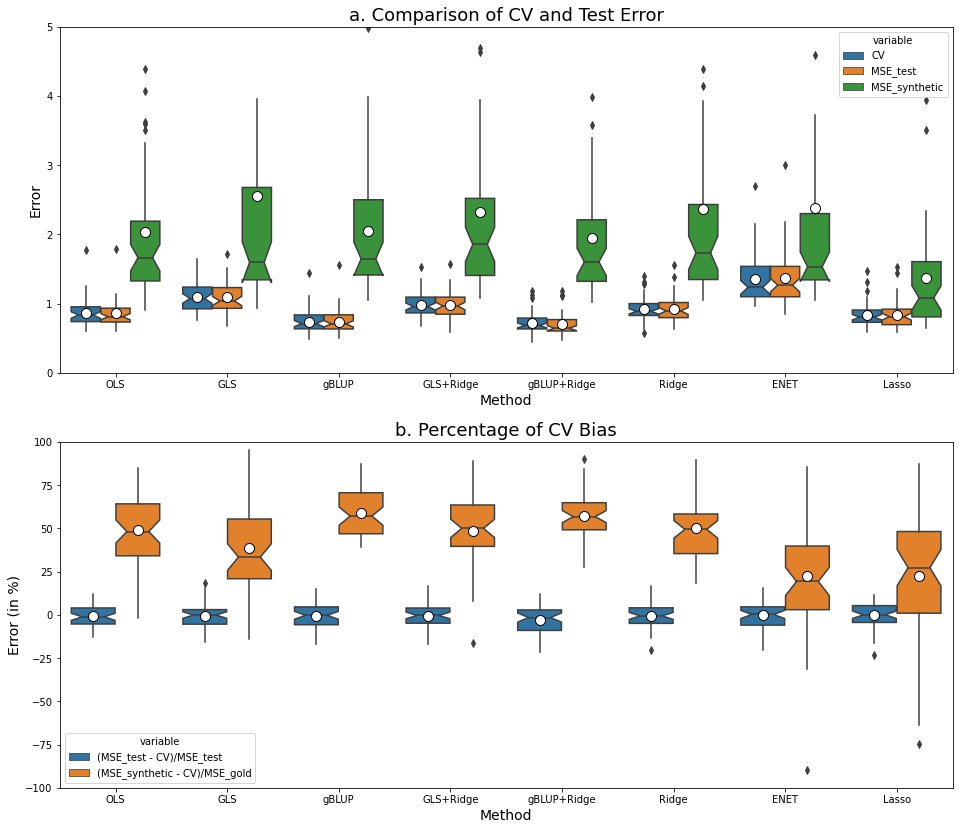

In [14]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(2,1, figsize=(16, 14))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=df_bias_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0]
                       )
ax[0].set_ylabel('Error', size=14)
ax[0].set_xlabel('Method', size=14)
ax[0].set_title('a. Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 5)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=df_bias_diff_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-100,100)
ax[1].set_ylabel('Error (in %)', size=14)
ax[1].set_xlabel('Method', size=14)
ax[1].set_title('b. Percentage of CV Bias', size=18)

## Correction

In [19]:
def correction_df_preparation(df, method_name):
    print(df.columns)
    temp = df.drop(['using_time', 'cv_hcv', 'w_te', 'w_resample', 'w_fake'],axis=1, inplace=False)
    new_df = temp
    new_df['cv_w_te'] = df['cv'] + df['w_te']
    new_df['cv_w_fake'] = df['cv'] + df['w_fake']
   #  new_df['cv_w_resample'] = df['cv'] + df['w_resample']
    print(new_df.columns)
    new_df = new_df[['cv', 'cv_w_te',  'mse_te', 'cv_w_fake','mse_fake']]
      #  'cv_w_resample']]
    new_df['method'] = method_name
    
    # new_df_diff = df[['w_te','w_resample', 'w_gen']]
    new_df_diff = pd.DataFrame()
    
    new_df_diff['w_te / mse_te'] = (df['w_te'])/df['mse_te'] * 100
    new_df_diff['w_fake/ mse_fake'] = (df['w_fake'])/df['mse_fake'] * 100
    new_df_diff['method'] = method_name
    return new_df, new_df_diff

In [20]:
ols_df_new, ols_diff = correction_df_preparation(ols_df, 'ols')
gls_df_new, gls_diff = correction_df_preparation(gls_df, 'gls')
blup_df_new, blup_diff = correction_df_preparation(blup_df, 'blup')
gls_ridge_new, gls_ridge_diff = correction_df_preparation(gls_ridge, 'gls_ridge')
blup_ridge_new, blup_ridge_diff = correction_df_preparation(blup_ridge, 'blup_ridge')
ridge_new, ols_ridge_diff = correction_df_preparation(ols_ridge, 'ridge')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'c

C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\1931397109.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\1931397109.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\1931397109.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [21]:
df = pd.concat([
    ols_df_new, gls_df_new, blup_df_new,  gls_ridge_new, blup_ridge_new, ridge_new
])
df_diff = pd.concat([
    ols_diff, gls_diff, blup_diff,  gls_ridge_diff, blup_ridge_diff, ols_ridge_diff
])
df_long = df.melt(id_vars='method')
df_diff_long = df_diff.melt(id_vars='method')


In [22]:
name1 = {'cv':'CV', 'mse_te':'MSE_test', 'mse_fake':'MSE_synthetic', 'cv_w_te':'w_synthetic','cv_w_te': 'w_test'}
name2 = {'w_te / mse_te': 'w_test/MSE_test', 'w_fake/ mse_fake':'w_synthetic/MSE_synthetic'}
df_long.replace(name1, inplace=True)
df_diff_long.replace(name2, inplace=True)

Text(0.5, 1.0, 'b. Percentage of Correction')

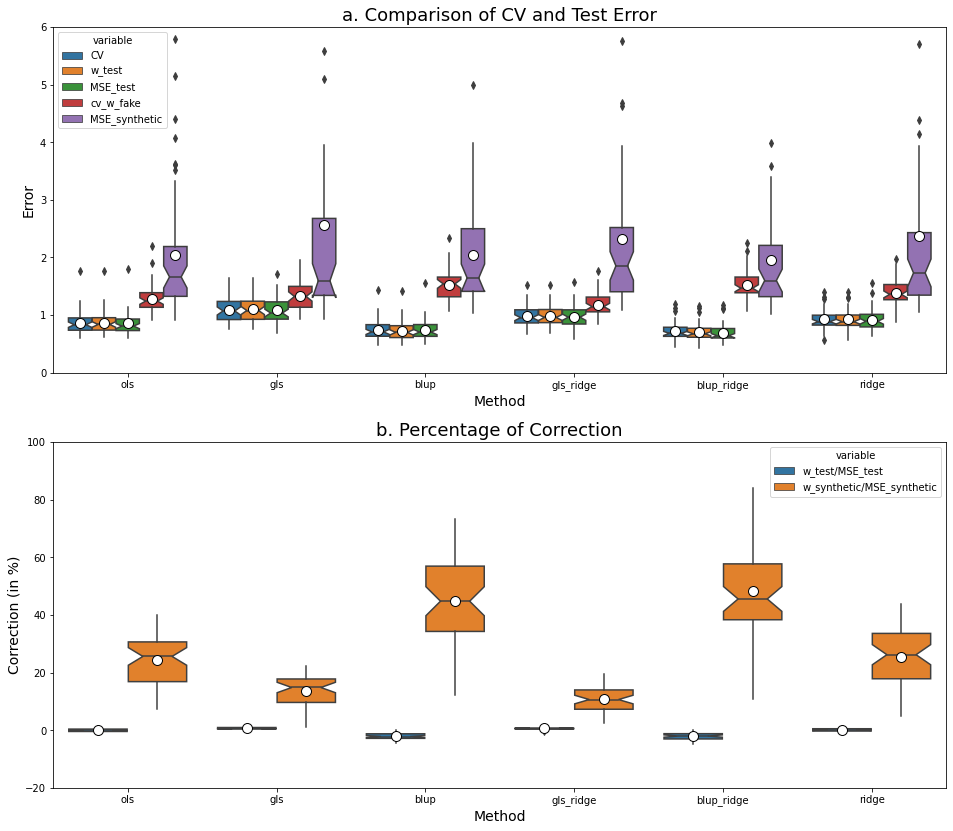

In [23]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(2,1, figsize=(16, 14))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=df_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0])
ax[0].set_ylabel('Error', size=14)
ax[0].set_xlabel('Method', size=14)
ax[0].set_title('a. Comparison of CV and Test Error', size=18)
gfg.set_ylim(0, 6)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=df_diff_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-20,100)
ax[1].set_ylabel('Correction (in %)', size=14)
ax[1].set_xlabel('Method', size=14)
ax[1].set_title('b. Percentage of Correction', size=18)

## Create Table

In [94]:
def error_ratio(df):
    cv = np.mean(df['cv'])
    mse_te = np.mean(df['mse_te'])
    mse_fake = np.mean(df['mse_fake'])

    re = {
        'CV':cv,
        'MSE\_{test}': mse_te,
        'MSE\_{synthetic}': mse_fake,
        'CVc\_{test}' :0,
        'CVc\_{synthetic}':0,
        # 'Correction\_{test} (in %)': 0,
        'Correction\_{synthetic} (in %)':0 
    }
    CVc_te = np.mean(df['cv']+df['w_te'])
    CVc_fake = np.mean(df['cv']+df['w_fake'])
    # correction_te = np.mean( (df['w_te']/(df['mse_te']-df['cv']))) * 100
    correction_fake= np.mean( (df['w_fake']/(df['mse_fake']-df['cv']))) *100
    correction_fake= np.mean( (df['w_fake'])/np.mean(df['mse_fake']-df['cv'])) *100
    re = {
        'CV':cv,
        'MSE_{test}': mse_te,
        'MSE_{synthetic}': mse_fake,
        'CVc_{test}' :CVc_te,
        'CVc_{synthetic}':CVc_fake,
        # 'Correction_{test} (in %)': correction_te,
        'Correction_{synthetic} (in %)': correction_fake
    }
    return re
    

In [77]:
import scipy.stats as stats
def anova_for_cvc(df):
    _, p_cv_mse_te = stats.f_oneway(df['cv'], df['mse_te'])
    _, p_cv_mse_gen = stats.f_oneway(df['cv'], df['mse_fake'])

    dict = {'CV v.s MSE_{test}': p_cv_mse_te,
             'CV v.s. MSE_{synthetic}': p_cv_mse_gen,
            'CV v.s. CVc_{test}':0,
            'CV v.s. CVc_{synthetic}': 0,
                'CVc_{test} v.s. MSE_{test}':0,
                'CVc_{synthetic} v.s. MSE_{synthetic}': 0,
             }
    try:
        cvc = df['cv'] + df['w_te']
        _, p_cv_cvc_te = stats.f_oneway(df['cv'], cvc)
        cvcgen = df['cv'] + df['w_fake']
        _, p_cv_cv_gen = stats.f_oneway(df['cv'], cvcgen)
        _, p_cvc_mse_te= stats.f_oneway(cvc, df['mse_te'])
        _, p_cvc_mse_gen= stats.f_oneway(cvcgen, df['mse_fake'])

        dict = {'CV v.s MSE_{test}': p_cv_mse_te,
                'CV v.s. MSE_{synthetic}': p_cv_mse_gen,
                'CV v.s. CVc_{test}':p_cv_cvc_te,
                'CV v.s. CVc_{synthetic}': p_cv_cv_gen,
                'CVc_{test} v.s. MSE_{test}':p_cvc_mse_te,
                'CVc_{synthetic} v.s. MSE_{synthetic}': p_cvc_mse_gen,
                }
    except Exception:
        print(df.columns)
        print(Exception)
        
    return dict


In [14]:
def create_table(df_list:list, method:list, function):
    df = pd.DataFrame()
    for i in range(len(df_list)):
        dicti = function(df_list[i])
        # print(dicti.keys())
        new_df = pd.DataFrame(dicti, index=[0])
        df = pd.concat([df, new_df], axis = 0)
    
    df.index = method
    
    return df

In [5]:
method_list = [ols_df, gls_df, blup_df, gls_ridge, blup_ridge, ols_ridge, ols_enet, ols_lasso]
method = ['OLS', 'GLS', 'gBLUP','GLS+Ridge', 'gBLUP+Ridge', 'Ridge', 'ENET', 'LASSO']
anova_table = create_table(method_list, method, anova_for_cvc)

NameError: name 'create_table' is not defined

In [89]:
print(anova_table.T.to_latex(float_format="%.2e"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &      OLS &      GLS &    gBLUP &  GLS+Ridge &  gBLUP+Ridge &    Ridge &     ENET &    LASSO \\
\midrule
CV v.s MSE\_\{test\}                    & 8.74e-01 & 9.95e-01 & 9.43e-01 &   8.98e-01 &     4.97e-01 & 9.84e-01 & 9.85e-01 & 9.06e-01 \\
CV v.s. MSE\_\{synthetic\}              & 2.84e-11 & 1.82e-04 & 3.68e-13 &   2.05e-09 &     5.55e-10 & 4.18e-08 & 9.82e-04 & 8.39e-05 \\
CV v.s. CVc\_\{test\}                   & 9.96e-01 & 8.73e-01 & 6.48e-01 &   8.80e-01 &     6.28e-01 & 9.82e-01 & 0.00e+00 & 0.00e+00 \\
CV v.s. CVc\_\{synthetic\}              & 4.21e-15 & 3.18e-06 & 3.13e-33 &   1.22e-06 &     2.09e-36 & 3.16e-20 & 0.00e+00 & 0.00e+00 \\
CVc\_\{test\} v.s. MSE\_\{test\}           & 8.78e-01 & 8.71e-01 & 7.11e-01 &   7.81e-01 &     8.43e-01 & 9.67e-01 & 0.00e+00 & 0.00e+00 \\
CVc\_\{synthetic\} v.s. MSE\_\{synthetic\} & 5.47e-06 & 1.56e-03 & 1.42e-03 &   1.92e-07 &     1.88e-02 & 1.18e-04 & 0.00e+00 & 0.00e+00 \\
\bottomrule
\end{tabular}



C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\903123199.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(anova_table.T.to_latex(float_format="%.2e"))


In [15]:
method_list = [ols_df, gls_df, blup_df, gls_ridge, blup_ridge, ols_ridge]
method = ['OLS', 'GLS', 'gBLUP','GLS+Ridge', 'gBLUP+Ridge', 'Ridge' ]
ratio_table = create_table(method_list, method, error_ratio)

NameError: name 'error_ratio' is not defined

In [96]:
print(ratio_table.T.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
{} &   OLS &   GLS &  gBLUP &  GLS+Ridge &  gBLUP+Ridge &  Ridge \\
\midrule
CV                            &  0.86 &  1.09 &   0.74 &       0.98 &         0.72 &   0.92 \\
MSE\_\{test\}                    &  0.86 &  1.09 &   0.74 &       0.98 &         0.70 &   0.92 \\
MSE\_\{synthetic\}               &  2.03 &  2.56 &   2.05 &       2.33 &         1.95 &   2.36 \\
CVc\_\{test\}                    &  0.86 &  1.10 &   0.72 &       0.99 &         0.70 &   0.93 \\
CVc\_\{synthetic\}               &  1.28 &  1.33 &   1.53 &       1.18 &         1.52 &   1.39 \\
Correction\_\{synthetic\} (in \%) & 35.39 & 16.30 &  60.24 &      15.04 &        64.93 &  32.31 \\
\bottomrule
\end{tabular}



C:\Users\Archibald\AppData\Local\Temp\ipykernel_11256\1058784222.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ratio_table.T.to_latex(float_format="%.2f"))


## Bias - Correction all together

In [18]:
def all_df_preparation(df, method_name):
    df.rename(columns={'mse_gen':'mse_fake', 'w_gen':'w_fake'}, inplace=True)
    try:
        print(df.columns)
        temp = df.drop(['using_time', 'cv_hcv', 'w_te', 'w_resample', 'w_fake'],axis=1, inplace=False)
        new_df = temp
        new_df['cv_w_te'] = df['cv'] + df['w_te']
        new_df['cv_w_fake'] = df['cv'] + df['w_fake']
        #  new_df['cv_w_resample'] = df['cv'] + df['w_resample']
        print(new_df.columns)
        new_df = new_df[['cv', 'cv_w_te',  'mse_te', 'cv_w_fake','mse_fake']]
          #  'cv_w_resample']]
        new_df['method'] = method_name
        
        # new_df_diff = df[['w_te','w_resample', 'w_gen']]
        new_df_diff = pd.DataFrame()
        
        new_df_diff['w_te / mse_te'] = (df['w_te'])/df['mse_te'] * 100
        new_df_diff['w_fake/ mse_fake'] = (df['w_fake'])/df['mse_fake'] * 100
        new_df_diff['mse_te - cv'] = (df['mse_te'] - df['cv'])/df['mse_te'] * 100
        new_df_diff['mse_gen - cv'] = (df['mse_fake'] - df['cv'])/df['mse_fake'] * 100
        new_df_diff['method'] = method_name
    except Exception:
        temp = df.drop(['using_time'],axis=1, inplace=False)
        new_df = temp
        print(new_df.columns)
        new_df = new_df[['cv',   'mse_te', 'mse_fake']]
          #  'cv_w_resample']]
        new_df['method'] = method_name
        
        # new_df_diff = df[['w_te','w_resample', 'w_fake']]
        new_df_diff = pd.DataFrame()
        new_df_diff['mse_te - cv'] = (df['mse_te'] - df['cv'])/df['mse_te'] * 100
        new_df_diff['mse_gen - cv'] = (df['mse_fake'] - df['cv'])/df['mse_fake'] * 100
        new_df_diff['method'] = method_name
    return new_df, new_df_diff

In [19]:
ols_df_new, ols_diff = all_df_preparation(ols_df, 'OLS')
gls_df_new, gls_diff = all_df_preparation(gls_df, 'GLS')
blup_df_new, blup_diff = all_df_preparation(blup_df, 'gBLUP')
gls_ridge_new, gls_ridge_diff = all_df_preparation(gls_ridge, 'GLS+Ridge')
blup_ridge_new, blup_ridge_diff = all_df_preparation(blup_ridge, 'gBLUP+Ridge')
ridge_new, ols_ridge_diff = all_df_preparation(ols_ridge, 'Ridge')
enet_new, enet_diff = all_df_preparation(ols_enet, 'ENET')
lasso_new, lasso_diff = all_df_preparation(ols_lasso, 'Lasso')
bslmm_new, bslmm_diff = all_df_preparation(bslmm_df, 'BSLMM')

Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'cv_hcv', 'using_time', 'mse_te', 'mse_fake', 'w_fake', 'w_te',
       'w_resample'],
      dtype='object')
Index(['cv', 'mse_te', 'mse_fake', 'cv_w_te', 'cv_w_fake'], dtype='object')
Index(['cv', 'c

C:\Users\Archibald\AppData\Local\Temp\ipykernel_9280\360732987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_9280\360732987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['method'] = method_name
C:\Users\Archibald\AppData\Local\Temp\ipykernel_9280\360732987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [23]:
df_bias = pd.concat([
    ols_df_new, gls_df_new, blup_df_new,
        # gls_ridge_new, blup_ridge_new,
          ridge_new, enet_new, lasso_new, bslmm_new
])
df_bias_diff = pd.concat([
    ols_diff, gls_diff, blup_diff,  
    # gls_ridge_diff, blup_ridge_diff,
     ols_ridge_diff, enet_diff, lasso_diff, bslmm_diff
])
df_bias_long = df_bias.melt(id_vars='method')
df_bias_diff_long = df_bias_diff.melt(id_vars='method')

In [24]:
name1 = {'cv':'CV', 'mse_te':'MSE_test', 'mse_fake':'MSE_synthetic', 'cv_w_fake':'W_synthetic','cv_w_te': 'w_test'}
name2 = {'mse_te - cv': '(MSE_test - CV)/MSE_test', 'mse_gen - cv':'(MSE_synthetic - CV)/MSE_gold', 'w_te / mse_te': 'w_test/MSE_test', 'w_fake/ mse_fake':'w_synthetic/MSE_synthetic'}
df_bias_long.replace(name1, inplace=True)
df_bias_diff_long.replace(name2, inplace=True)



Text(0.5, 1.0, 'b. Percentage of CV Bias and Percentage of Correction')

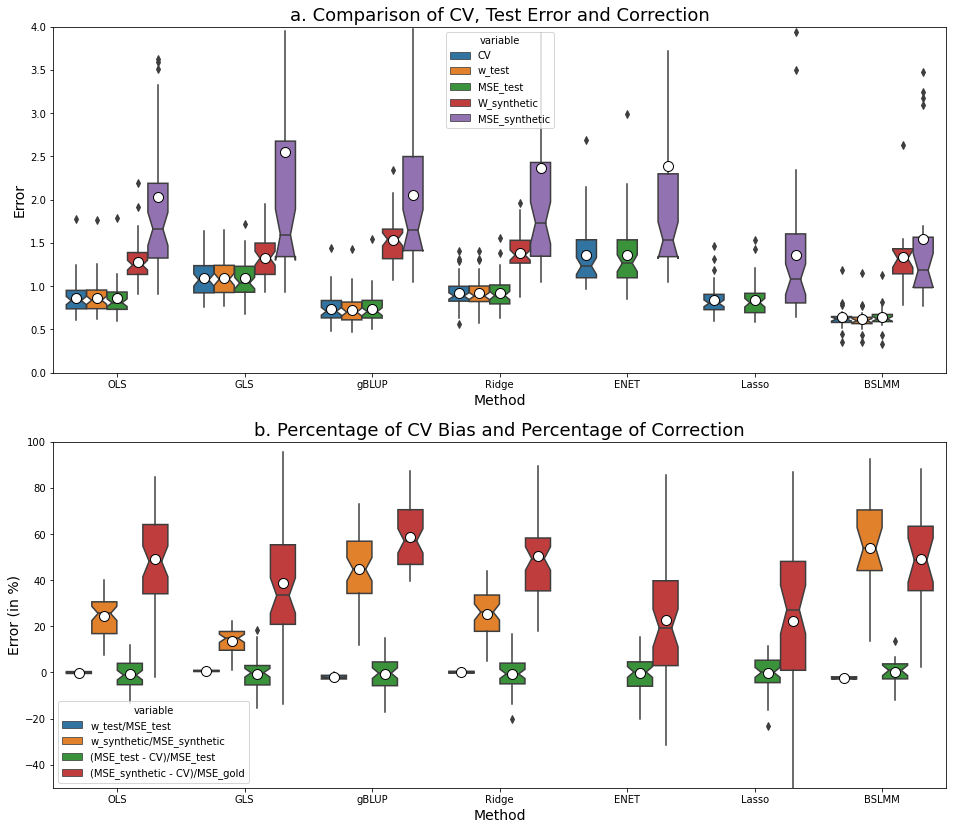

In [25]:
# Create the boxplot
plt.close('all')
fig, ax = plt.subplots(2,1, figsize=(16, 14))

gfg = sns.boxplot(x='method', y='value', hue='variable',
            data=df_bias_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[0]
                       )
ax[0].set_ylabel('Error', size=14)
ax[0].set_xlabel('Method', size=14)
ax[0].set_title('a. Comparison of CV, Test Error and Correction', size=18)
gfg.set_ylim(0, 4)

gfg=sns.boxplot(x='method', y='value', hue='variable',
            data=df_bias_diff_long, showmeans=True, 
            notch=True, showcaps=False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
                       ax = ax[1])
gfg.set_ylim(-50,100)
ax[1].set_ylabel('Error (in %)', size=14)
ax[1].set_xlabel('Method', size=14)
ax[1].set_title('b. Percentage of CV Bias and Percentage of Correction', size=18)

### Bias and Correction table

In [28]:
def bias_correction_sd(df):
    cv = np.std(df['cv'])
    mse_te = np.std(df['mse_te'])
    mse_fake = np.std(df['mse_fake'])

    re = {
        'CV':cv,
        'MSE\_{test}': mse_te,
        'MSE\_{synthetic}': mse_fake,
        'CVc\_{test}' :0,
        'CVc\_{synthetic}':0,
        # 'Correction\_{test} (in %)': 0,
        'Correction\_{synthetic} (in %)':0 
    }
    
    try:
        CVc_te = np.std(df['cv']+df['w_te'])
        CVc_fake = np.std(df['cv']+df['w_fake'])
        # correction_te = np.mean( (df['w_te']/(df['mse_te']-df['cv']))) * 100
        # correction_fake= np.mean( (df['w_fake']/(df['mse_fake']-df['cv']))) *100
        correction_fake= np.std( (df['w_fake'])/np.mean(df['mse_fake']-df['cv'])) *100
        re = {
            'CV':cv,
            'MSE\_{test}': mse_te,
            'MSE\_{synthetic}': mse_fake,
            'CVc\_{test}' :CVc_te,
            'CVc\_{synthetic}':CVc_fake,
            # 'Correction_{test} (in %)': correction_te,
            'Correction\_{synthetic} (in %)': correction_fake
        }
    except Exception:
        print(df.columns)
        print(Exception)
        
    return re

In [23]:
def bias_correction(df):
    cv = np.mean(df['cv'])
    mse_te = np.mean(df['mse_te'])
    mse_fake = np.mean(df['mse_fake'])

    re = {
        'CV':cv,
        'MSE\_{test}': mse_te,
        'MSE\_{synthetic}': mse_fake,
        'CVc\_{test}' :0,
        'CVc\_{synthetic}':0,
        # 'Correction\_{test} (in %)': 0,
        'Correction\_{synthetic} (in %)':0 
    }
    
    try:
        CVc_te = np.mean(df['cv']+df['w_te'])
        CVc_fake = np.mean(df['cv']+df['w_fake'])
        # correction_te = np.mean( (df['w_te']/(df['mse_te']-df['cv']))) * 100
        correction_fake= np.mean( (df['w_fake']/(df['mse_fake']-df['cv']))) *100
        correction_fake= np.mean( (df['w_fake'])/np.mean(df['mse_fake']-df['cv'])) *100
        re = {
            'CV':cv,
            'MSE\_{test}': mse_te,
            'MSE\_{synthetic}': mse_fake,
            'CVc\_{test}' :CVc_te,
            'CVc\_{synthetic}':CVc_fake,
            # 'Correction_{test} (in %)': correction_te,
            'Correction\_{synthetic} (in %)': correction_fake
        }
    except Exception:
        print(df.columns)
        print(Exception)
        
    return re

In [27]:
def create_table_correction(df_list:list, method:list):
    df = pd.DataFrame()
    for i in range(len(df_list)):
        dicti = bias_correction(df_list[i])
        # print(dicti.keys())
        new_df = pd.DataFrame(dicti, index=[0])
        dicti2 = bias_correction_sd(df_list[i])
        new_df2 = pd.DataFrame(dicti2, index=[0])
        df = pd.concat([df, new_df, new_df2], axis = 0)
    
    df.index = method
    
    return df

In [33]:
method_list = [ols_df, gls_df, blup_df, gls_ridge, blup_ridge, ols_ridge, ols_enet, ols_lasso]
method = ['OLS', 'GLS', 'gBLUP','GLS+Ridge', 'gBLUP+Ridge', 'Ridge', 'ENET', 'LASSO']
method = ['mean', 'std','mean', 'std','mean', 'std','mean', 'std','mean', 'std','mean', 'std','mean', 'std' ,'mean', 'std']
bias_correction_table = create_table_correction(method_list, method, )

Index(['cv', 'using_time', 'mse_te', 'mse_fake'], dtype='object')
<class 'Exception'>
Index(['cv', 'using_time', 'mse_te', 'mse_fake'], dtype='object')
<class 'Exception'>
Index(['cv', 'using_time', 'mse_te', 'mse_fake'], dtype='object')
<class 'Exception'>
Index(['cv', 'using_time', 'mse_te', 'mse_fake'], dtype='object')
<class 'Exception'>


In [34]:
print(bias_correction_table.T.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
{} &  mean &  std &  mean &  std &  mean &   std &  mean &  std &  mean &  std &  mean &  std &  mean &  std &  mean &  std \\
\midrule
CV                             &  0.86 & 0.20 &  1.09 & 0.22 &  0.74 &  0.16 &  0.98 & 0.19 &  0.72 & 0.15 &  0.92 & 0.17 &  1.36 & 0.36 &  0.84 & 0.17 \\
MSE\textbackslash \_\{test\}                    &  0.86 & 0.19 &  1.09 & 0.23 &  0.74 &  0.17 &  0.98 & 0.19 &  0.70 & 0.15 &  0.92 & 0.19 &  1.36 & 0.38 &  0.84 & 0.20 \\
MSE\textbackslash \_\{synthetic\}               &  2.03 & 1.07 &  2.56 & 2.62 &  2.05 &  1.08 &  2.33 & 1.41 &  1.95 & 1.24 &  2.36 & 1.69 &  2.39 & 2.08 &  1.36 & 0.89 \\
CVc\textbackslash \_\{test\}                    &  0.86 & 0.20 &  1.10 & 0.22 &  0.72 &  0.16 &  0.99 & 0.18 &  0.70 & 0.15 &  0.93 & 0.17 &  0.00 & 0.00 &  0.00 & 0.00 \\
CVc\textbackslash \_\{synthetic\}               &  1.28 & 0.24 &  1.33 & 0.25 &  1.53 &  0.26 &  1.18 & 0.20 &  1.52 & 0.24 &  1.39 & 0.22 &  0.00 & 

C:\Users\Archibald\AppData\Local\Temp\ipykernel_40564\1639983952.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(bias_correction_table.T.to_latex(float_format="%.2f"))
